<a href="https://colab.research.google.com/github/Gh6if84vi/ML2024/blob/main/10_AIML_III_Module_2_Lab_4_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module 2: Appreciating, Interpreting and Visualizing Data**

Lab 4: t-Distributed Stochastic Neighbor Embedding (t-SNE)


---




t-sne which acronyms for t-distributed stochastic neighbor embedding algorithm which is a dimensinality reduction algorithm to visulaize high dimensional datasets



1.It is unsupervised learning algorithm

2.Non-linear techinque used for data exploration and visualizing high dimensional data



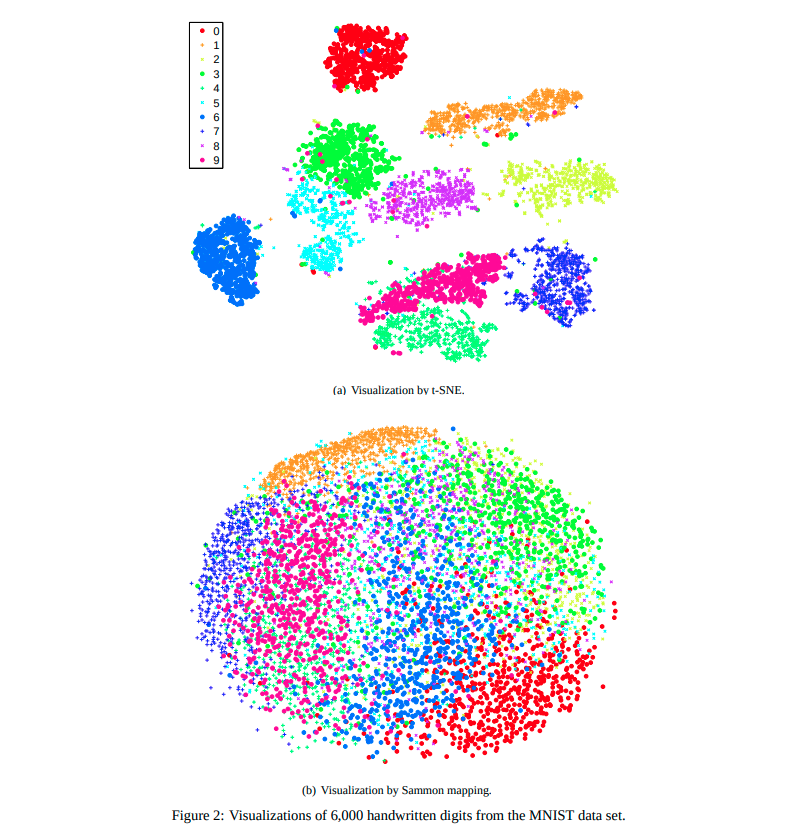

t-SNE has a tuneable parameter, perplexity which balances attention between the local and global aspects of your data. It is a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of t-SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” But the story is more nuanced than that. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.

Also the t-SNE algorithm doesn’t always produce similar output on successive runs as there are additional hyperparameters related to the optimization process.

### HOW DOES T-SNE WORK??

The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function. Let’s break that down into 3 basic steps.

1. Measure similarities between points in the high dimensional space. Think of a bunch of data points scattered on a 2D space. For each data point (xi) we’ll center a Gaussian distribution over that point. Then we measure the density of all points (xj) under that Gaussian distribution. Then renormalize for all points. This gives us a set of probabilities (Pij) for all points. Those probabilities are proportional to the similarities. All that means is, if data points x1 and x2 have equal values under this gaussian circle then their proportions and similarities are equal and hence you have local similarities in the structure of this high-dimensional space. The Gaussian distribution or circle can be manipulated using what’s called perplexity, which influences the variance of the distribution (circle size) and essentially the number of nearest neighbors.

2. This step is similar to step 1, but instead of using a Gaussian distribution we use a Student t-distribution with one degree of freedom, which is also known as the Cauchy distribution (See fig below). This gives us a second set of probabilities (Qij) in the low dimensional space. As you can see the Student t-distribution has heavier tails than the normal distribution. The heavy tails allow for better modeling of far apart distances.

3. The last step is that we want these set of probabilities from the low-dimensional space (Qij) to reflect those of the high dimensional space (Pij) as best as possible. We want the two map structures to be similar. We measure the difference between the probability distributions of the two-dimensional spaces using Kullback-Liebler divergence (KL). Finally, we use gradient descent to minimize our KL cost function.

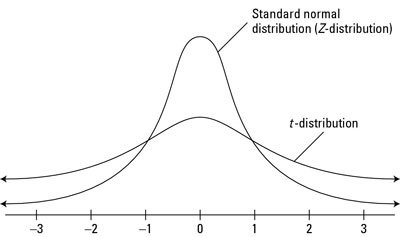

Scikit-learn has an implementation of t-SNE available which provides a wide variety of tuning parameters for t-SNE, and the most notable ones are:

1. n_components (default: 2): Dimension of the embedded space.
2. perplexity (default: 30): The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.
3. n_iter (default: 1000): Maximum number of iterations for the optimization. Should be at least 250.
4. method (default: ‘barnes_hut’): Barnes-Hut approximation runs in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time.

In [7]:
#Numpy library..........
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform,pdist

#sklearn
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

#Random state
RS=20150101
# matplotlib.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

#seaborn
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook",font_scale=1.5,rc={"lines.linewidth":2.5})

1797 images each of size 8 x 8 loaded using load_digits()

In [5]:
#Loading the digits
digits=load_digits()
digits.data.shape


(1797, 64)

**Printing some images from the dataset**

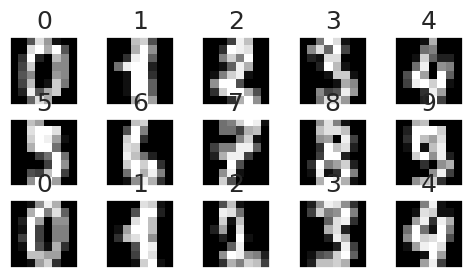

In [10]:
nrows,ncols=3,5
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols*nrows):
  ax=plt.subplot(nrows,ncols,i+1)
  ax.matshow(digits.images[i,...])
  plt.xticks([]);plt.yticks([])
  plt.title(digits.target[i])



In [11]:
X=np.vstack([digits.data[digits.target==i] for i in range(15)])
y=np.hstack([digits.target[digits.target==i] for i in range(15)])

## Now using TSNE to fit the dataset with the default values.


1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : ‘barnes_hut’


---



In [12]:
digits_proj=TSNE(init='pca',random_state=RS).fit_transform(X)


**Visualizing the data in the projected space**

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


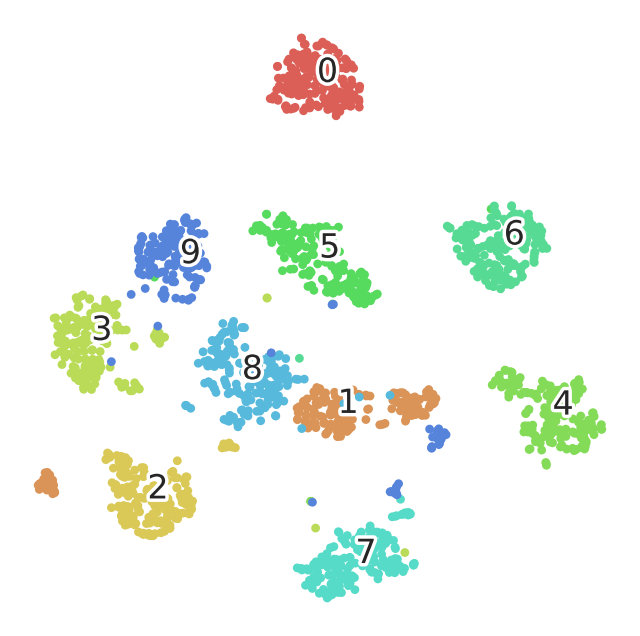

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(1.4825974, 54.657738, '0'),
  Text(5.0777693, -12.597616, '1'),
  Text(-28.021975, -29.97124, '2'),
  Text(-37.792305, 2.2291808, '3'),
  Text(42.499027, -12.936368, '4'),
  Text(1.8717124, 18.981644, '5'),
  Text(33.992374, 21.629797, '6'),
  Text(8.183837, -43.092808, '7'),
  Text(-11.596096, -5.712617, '8'),
  Text(-22.37827, 17.824018, '9'),
  Text(nan, nan, '10'),
  Text(nan, nan, '11'),
  Text(nan, nan, '12'),
  Text(nan, nan, '13'),
  Text(nan, nan, '14')])

In [15]:
def scatter(x,colors):
  #We choose a color palette with seaborn.
  palette=np.array(sns.color_palette("hls",15))
  #Lets create a scatter plot
  f=plt.figure(figsize=(8,8))
  ax=plt.subplot(aspect='equal')
  sc=ax.scatter(x[:,0],x[:,1],lw=0,s=40,c=palette[colors.astype(int)])
  plt.xlim(-25,25)
  plt.ylim(-25,25)
  ax.axis('off')
  ax.axis('tight')
  #We add the labels for each digit.
  txts=[]
  for i in range(15):
    #Position of each label.
    xtext,ytext=np.median(x[colors==i,:],axis=0)
    txt=ax.text(xtext,ytext,str(i),fontsize=24)
    txt.set_path_effects([PathEffects.Stroke(linewidth=5,foreground="w"),PathEffects.Normal()])
    txts.append(txt)
  plt.show()
  return f,ax,sc,txts

scatter(digits_proj,y)

# Tweaking some of the hyperparameters to better understand their role


---
Changing the PERPLEXITY values



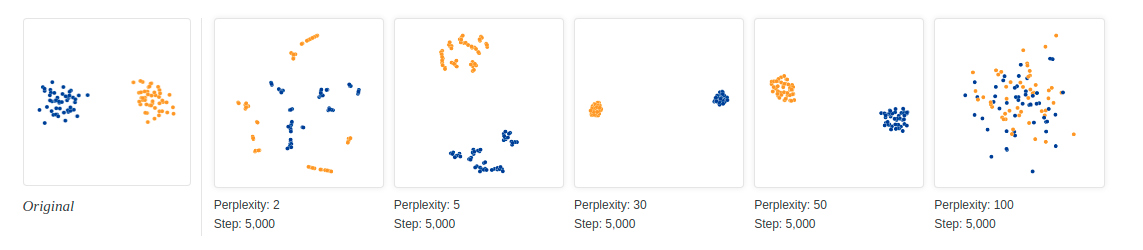

With perplexity values in the range (5 - 50) suggested by van der Maaten & Hinton, the diagrams do show these clusters, although with very different shapes. Outside that range, things get a little weird. With perplexity 2, local variations dominate. The image for perplexity 100, with merged clusters, illustrates a pitfall: for the algorithm to operate properly, the perplexity really should be smaller than the number of points. Implementations can give unexpected behavior otherwise.



---
n_components : 2

perplexity : 5

n_iter : 1000

method : ‘barnes_hut’


---





/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


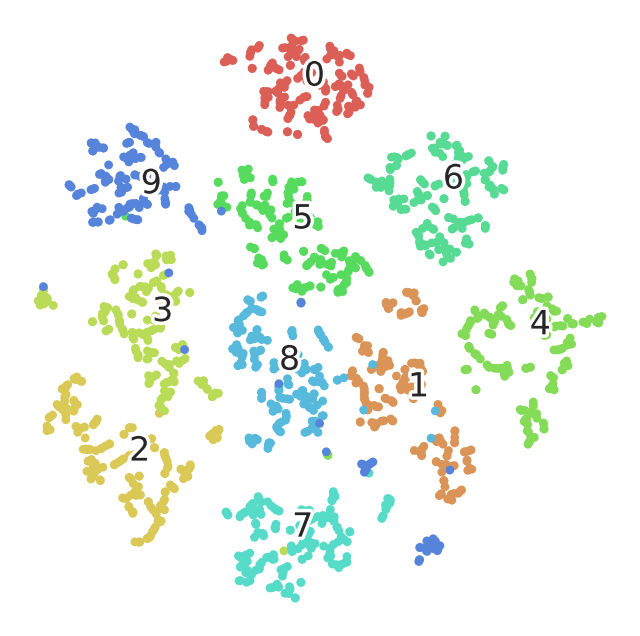

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(1.2149053, 74.55896, '0'),
  Text(34.722942, -23.419514, '1'),
  Text(-54.98135, -43.66004, '2'),
  Text(-47.59403, 0.33279067, '3'),
  Text(73.88858, -3.84356, '4'),
  Text(-2.466417, 29.544537, '5'),
  Text(45.9252, 42.14543, '6'),
  Text(-2.5614448, -67.64259, '7'),
  Text(-6.792126, -14.977098, '8'),
  Text(-51.27207, 40.62439, '9'),
  Text(nan, nan, '10'),
  Text(nan, nan, '11'),
  Text(nan, nan, '12'),
  Text(nan, nan, '13'),
  Text(nan, nan, '14')])

In [16]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=5).fit_transform(X)

scatter(digits_proj, y)

We can see that there are local clusters within the same number group as well. This is happening as the perplexity being at 5, allows the local neighbourhood to dominate. Let us now see what happens if we increase the perplexity to 100, thereby increasing global impact.



---


1. n_components : 2
2. perplexity : **100**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


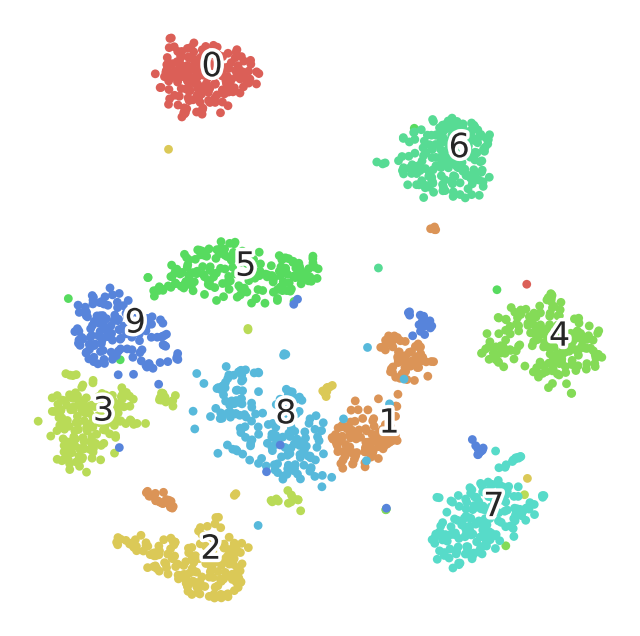

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(-7.86511, 27.852484, '0'),
  Text(6.6357965, -7.836977, '1'),
  Text(-7.959125, -20.469086, '2'),
  Text(-16.7661, -6.6302915, '3'),
  Text(20.606762, 0.866192, '4'),
  Text(-5.108097, 7.885542, '5'),
  Text(12.386075, 19.749113, '6'),
  Text(15.221185, -16.197792, '7'),
  Text(-1.8189374, -6.9108105, '8'),
  Text(-14.166046, 2.1875188, '9'),
  Text(nan, nan, '10'),
  Text(nan, nan, '11'),
  Text(nan, nan, '12'),
  Text(nan, nan, '13'),
  Text(nan, nan, '14')])

In [17]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=100).fit_transform(X)

scatter(digits_proj, y)

The general structure of the plot remained similar to the one with perplexity = 30 (default), but on careful observation you can observe many data points not being part of the group they are supposed to be in. This is because of the large number of points considered for the neighbourhood (as perplexity value = 100 is higher), thereby allowing 2 data points from different groups to end up closer.



---

### Changing the NUMBER OF ITERATIONS

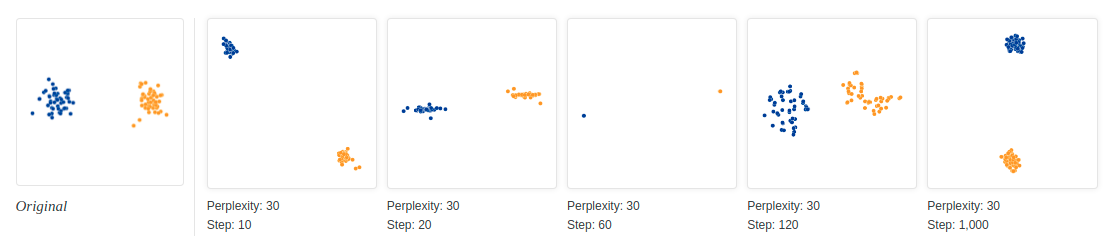

The images above show five different runs at perplexity 30. The first four were stopped before stability. After 10, 20, 60, and 120 steps you can see layouts with seeming 1-dimensional and even pointlike images of the clusters. If you see a t-SNE plot with strange “pinched” shapes, chances are the process was stopped too early. Unfortunately, there’s no fixed number of steps that yields a stable result. Different data sets can require different numbers of iterations to converge.

The most important thing is to iterate until reaching a stable configuration.





---


1. n_components : 2
2. perplexity : 30
3. n_iter : **300**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


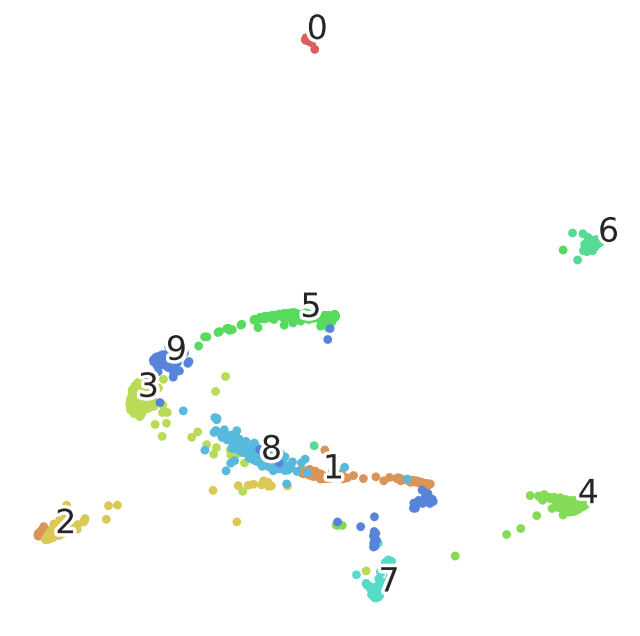

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(-0.06568965, 4.2618895, '0'),
  Text(0.059730805, -1.0485938, '1'),
  Text(-2.0167034, -1.7102673, '2'),
  Text(-1.3762581, -0.06264525, '3'),
  Text(2.0366592, -1.3479756, '4'),
  Text(-0.114658095, 0.90358466, '5'),
  Text(2.193946, 1.8127592, '6'),
  Text(0.49115145, -2.4151886, '7'),
  Text(-0.42125124, -0.8190427, '8'),
  Text(-1.1585317, 0.38461486, '9'),
  Text(nan, nan, '10'),
  Text(nan, nan, '11'),
  Text(nan, nan, '12'),
  Text(nan, nan, '13'),
  Text(nan, nan, '14')])

In [19]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=250).fit_transform(X)

scatter(digits_proj, y)

As can be seen from the figure above, stopping the optimization earlier (in 250 iterations) resulted in a suboptimal clustering of the groups.

Let us now see how the results are affected if t-SNE is run for larger number of iterations


---


1. n_components : 2
2. perplexity : 30
3. n_iter : **5000**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


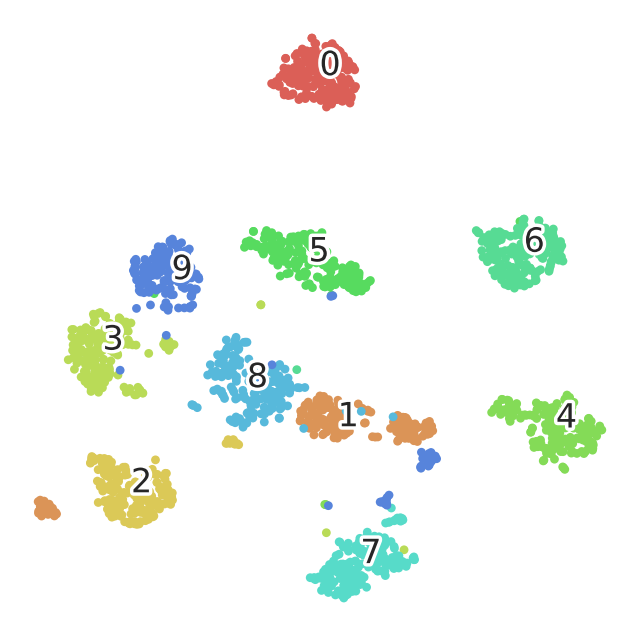

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(2.1734126, 84.75879, '0'),
  Text(6.403846, -18.877012, '1'),
  Text(-41.639286, -38.368656, '2'),
  Text(-48.260696, 3.7543118, '3'),
  Text(57.1284, -19.248789, '4'),
  Text(-0.37400252, 29.800209, '5'),
  Text(49.64323, 32.639946, '6'),
  Text(11.671087, -59.268005, '7'),
  Text(-14.701414, -7.329482, '8'),
  Text(-32.22429, 24.550812, '9'),
  Text(nan, nan, '10'),
  Text(nan, nan, '11'),
  Text(nan, nan, '12'),
  Text(nan, nan, '13'),
  Text(nan, nan, '14')])

In [20]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=5000).fit_transform(X)

scatter(digits_proj, y)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


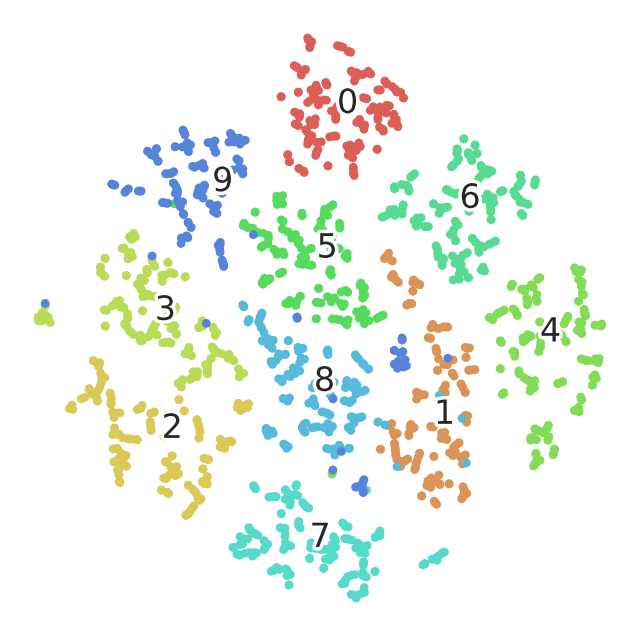

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(4.541111, 89.90566, '0'),
  Text(45.36721, -41.25437, '1'),
  Text(-69.34232, -47.19806, '2'),
  Text(-72.224144, 2.6151493, '3'),
  Text(90.001335, -6.535694, '4'),
  Text(-4.056843, 28.904839, '5'),
  Text(56.101974, 49.87031, '6'),
  Text(-7.039297, -93.23244, '7'),
  Text(-5.210746, -27.337215, '8'),
  Text(-48.090843, 56.90372, '9'),
  Text(nan, nan, '10'),
  Text(nan, nan, '11'),
  Text(nan, nan, '12'),
  Text(nan, nan, '13'),
  Text(nan, nan, '14')])

In [21]:
perplexity_value = 3
number_iterations = 1500
method = "barnes_hut"
digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

Exercise:

Now that you understand t-SNE a bit better, can you point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other?


Pointers:

a. Which of the two algorithms is linear and which one is non-linear?

        PCA is linear algorithm whereas TSNA is non-linear algorithm

b. How does the non-linearity in one of these two algorithms help in capturing certain data sets?

               **The non linearity in t-SNE helps to capture and reveal complex relationships and structures in the dat that are non apparent in a linear transformation**
c.PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood?

                 t-SNE prioritizes preserving local neighborhoods, meaning that it tries to keep similar points close together. It does not prioritize maintaining large pairwise distances, so points that are far apart in the high-dimensional space might not be as far apart in the t-SNE visualization.

d.Can you comment on which one of the two is computationally more expensive?

                  As we see t-SNE is more expensive because it involves calculating pairwise simimlarities and performing multiple iterations to minimize gradient descent

**2.How does the computational complexity and runtime of t-SNE scale with dataset size and dimensionality?**


   *The computational complexity of t-SNE scales approximately with
𝑂
(
𝑁
2
)
O(N
2
 ), where
𝑁
N is the number of data points. This is because t-SNE calculates pairwise similarities between all points.*

---->*Dimensionality: The dimensionality of the data has a less significant impact on the complexity compared to the number of data points. However, higher dimensional data can still slow down the initial calculation of pairwise similarities and the gradient descent optimization process.*


**3)What are some limitations or potential pitfalls to be aware of when using t-SNE? (tell atleast 3)t**

   **a.Computational Expense**: As mentioned, t-SNE is computationally intensive, especially for large datasets. This can lead to long runtimes and high memory usage.

**b.Parameter Sensitivity**: t-SNE has several parameters (e.g., perplexity, learning rate) that can significantly affect the outcome. Choosing the right parameters often requires experimentation and can be challenging.

**c.Non-Deterministic**: t-SNE's results can vary between runs due to its stochastic nature. Different initializations and random seeds can lead to different visualizations, making it less consistent.

**d.Over-interpretation**: Users might be tempted to interpret distances in the t-SNE plot as exact relationships, but t-SNE primarily focuses on preserving local structure, not global distances.

**d.High-Dimensional Tangles**: For very high-dimensional data, t-SNE might struggle to find an appropriate low-dimensional embedding that faithfully represents the data structure, potentially leading to misleading visualizations.

    



